In [1]:
using Plots
using Distributions
using Statistics
using Random 

In [2]:
using LinearAlgebra
using SpecialFunctions
using StatsBase
using StatsPlots

In [3]:
using CSV
using DataFrames

In [4]:
Random.seed!(1)

TaskLocalRNG()

### Question

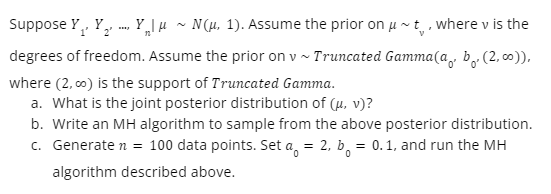

### Solution

Given :
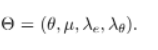
Posterior Distribution (q
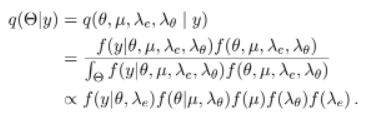

So using above relation:
 <b> $$ F(u,v) \propto  e^{\frac{-\Sigma(Yi-u)^{2}}{2} -\frac{v}{a}}(1+\frac{u^{2}}{v})^{-\frac{v+1}{2}}(\frac{v}{a})^{b-1}\frac{\tau(\frac{v+1}{2})}{\sqrt{v\pi}\tau(\frac{v}{2})} $$</b>
 
#### This F(u,v) is our posterior distribution

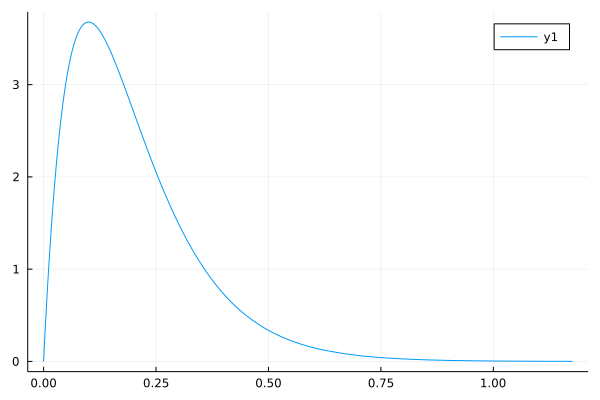

In [5]:
plot(Gamma(2,0.1))

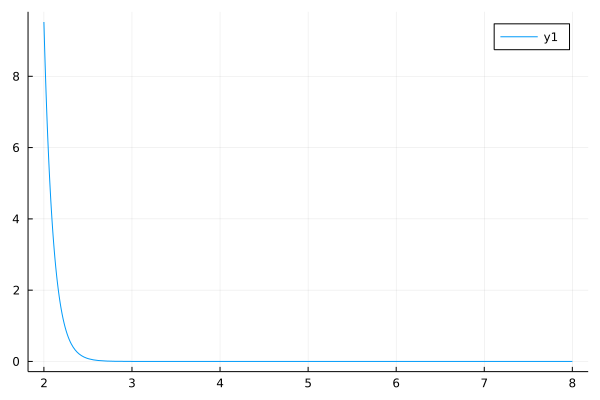

In [6]:
plot(truncated(Gamma(2,0.1),2,8))

#### From above plots, one can say that if v follows truncated gamma in range(2,infinity) , then most probably its value will close to 2 ,so it would be good to assume  2 as initial value of v and standard deviation of proposal distribution to be small .. 

In [7]:
# Calculating posterior distribution for given u,v:

function posterior(u,v)
  
    n=100
    a = 2
    b = 0.1
    summision =0
    
    sample_Y= rand(Normal(u,1),n)
   
    for i in 1:n
        summision += (sample_Y[i]-u)^2
    end    
    
    post = exp(-summision/2 - v/a)*((1+(u^2)/v)^-((v+1)/2)) * ((v/a)^(b-1)) * gamma((v+1)/2)/(gamma(v/2)*((v*pi)^0.5))
  
    return post
end    
    

posterior (generic function with 1 method)

#### Above plot indicate that v is centeric around 2 ...

In [8]:
# AS u follows tv so let find out expected value of u or having "good" guess value:
X = rand(TDist(2),1000)
u = mean(X)

0.048751535598896605

In [9]:
function MH_algo(v_guess , h)
    Samples  = 1000
    u_samples = []
    push!(u_samples,u)

    v_samples = []
    push!(v_samples,v_guess)
    accept =0


    for i in 2:Samples
        u_propos = rand(Normal(0,1),1)
        v_propos = rand(Normal(2,h),1)
        ratio = posterior(u_propos[1],v_propos[1])/posterior(u_samples[i-1],v_samples[i-1])
        alpha = min(1,ratio)
        U = rand(Uniform(0,1),1)
        if U[1]<alpha
            push!(u_samples,u_propos[1])
            push!(v_samples,v_propos[1])
            accept+=1
        else 
            push!(u_samples,u_samples[i-1])
            push!(v_samples,v_samples[i-1])

        end
    end 
   
    return u_samples,v_samples,accept
end            
        

MH_algo (generic function with 1 method)

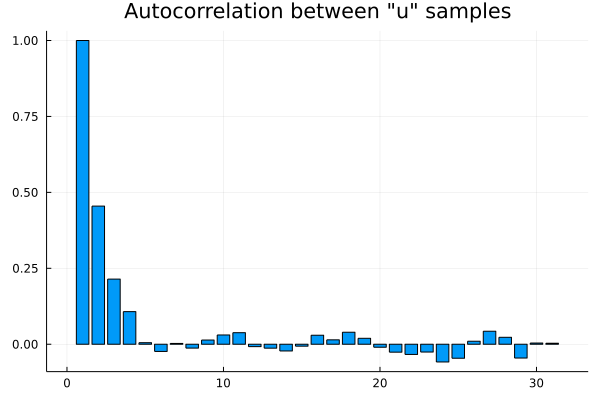

In [10]:
u_samples,v_samples,accept= MH_algo(2,0.2)
U_samples = [convert(Float64,u_samples[x]) for x in 1:1000]
acf = StatsBase.autocor(U_samples)
plot(bar(acf, title = "Autocorrelation between \"u\" samples", legend = false))

#### Acceptance Ratio

In [11]:
 println("The ACCEPTANCE ratio comes out to be: ",accept/1000) # As Samples =1000 , that's why 1000 is used here.....

The ACCEPTANCE ratio comes out to be: 0.553


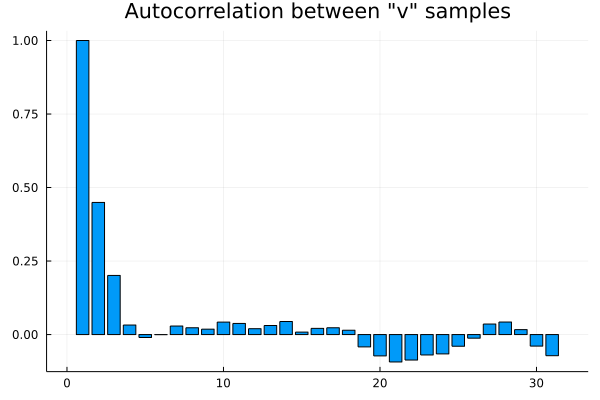

In [12]:
V_samples = [convert(Float64,v_samples[x]) for x in 1:1000]
acf_y = StatsBase.autocor(V_samples)
plot(bar(acf_y, title = "Autocorrelation between \"v\" samples", legend = false))

In [13]:
# plot(scatter(u_samples,size=(400,400),title = "Trace plot for u"))

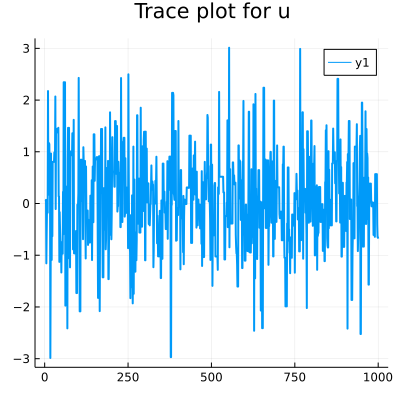

In [14]:
plot(u_samples,size=(400,400),title = "Trace plot for u",lw =2)

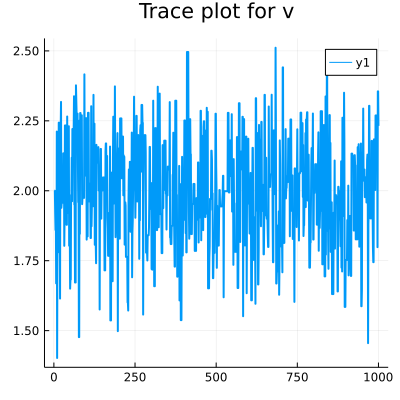

In [15]:
plot(v_samples,size=(400,400),title = "Trace plot for v",lw=2)

### Question
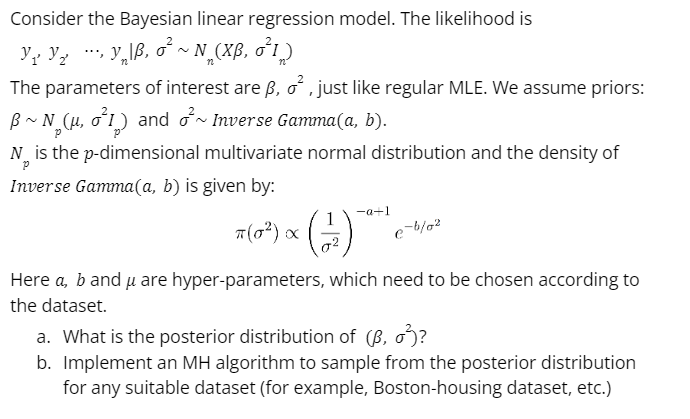

### Solution

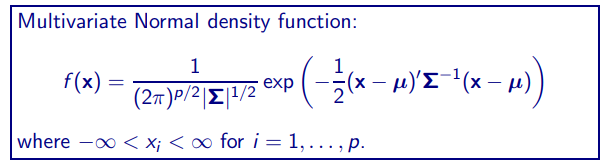

<p> <b> Using the relation discussed in the above question, similarly , we can found posterior in this case too </b> </p>
<p> </p>

<p> </p>

$$ F(\beta,\sigma^{2})  \propto  \frac{e^{-\frac{1}{2}(Y-X\beta)^{T} \Sigma_{1}^{-1}(Y-X\beta)}}{|\Sigma_{1}|^{\frac{1}{2}}}\frac{e^{-\frac{1}{2}(\beta-u)^{T} \Sigma_{2}^{-1}(\beta-u)}}{|\Sigma_{2}|^{\frac{1}{2}}}\frac{1}{\sigma^{2}}^{-a-1}e^{\frac{-b}{\sigma^{2}}}$$


\\
<p> <b> Here Y is (n,1) vector, $\Sigma_{1}=\sigma^{2}I_{n},\Sigma_{2}=\sigma^{2}I_{p}$

In [16]:
# data = CSV.read("Downloads\\Boston_House.csv",DataFrame)
# println(size(data))

In [17]:
# data[:,[:MEDV]]

In [18]:
# describe(data)

In [19]:
# array = []
# for i in 1:50
#     push!(array,data[i,"MEDV"])  
# end
# println(mean(array))
# println(var(array))

In [20]:
# Considering only 50 samples :
#Expected value of Y(MEDV) comes out to be 20.5
# Variance =  36.2 -->this mean inverse gamma should have expected value near to this variance 
# It gives us hint about the parameters a and b to be used as E[X] = b/(a-1) and Var = b^2 / ((a-1)^2 * (a-2)) for inverse gamma
# It give approximate a =12 and b =225


In [21]:
# plot(array)

In [22]:
# X =  data[1:50,[:TAX,:RM,:AGE,:LSTAT]]

In [23]:
# Y = data[1:50,[:MEDV]]

In [24]:
# using GLM

In [25]:
# b1 =[]
# b2=[]
# b3=[]
# b4=[]
# DATA =hcat(X,Y)
# for i in 1:50
#     fm = @formula(MEDV~TAX+RM+AGE+LSTAT)
#     linear_Reg= lm(fm,DATA)
#     push!(b1,coef(linear_Reg)[2:2])
#     push!(b2,coef(linear_Reg)[3:3])
#     push!(b3,coef(linear_Reg)[4:4])
#     push!(b4,coef(linear_Reg)[5:5])
# end
# println(mean(b1))
# println(mean(b2))
# println(mean(b3))
# println(mean(b4))